In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries loaded successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

✅ All libraries loaded successfully!
Pandas version: 2.3.3
Numpy version: 2.3.3


In [2]:
# Load the Walmart sales data
df = pd.read_csv('../data/raw/Walmart_Sales.csv')

# Basic information
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (6435, 8)

Columns: ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

First few rows:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# Data types and missing values
print("=" * 60)
print("DATA TYPES AND MISSING VALUES")
print("=" * 60)
df.info()

print("\n" + "=" * 60)
print("MISSING VALUES SUMMARY")
print("=" * 60)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0])

print("\n" + "=" * 60)
print("BASIC STATISTICS")
print("=" * 60)
df.describe()

DATA TYPES AND MISSING VALUES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB

MISSING VALUES SUMMARY
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

BASIC STATISTICS


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [4]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract temporal features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Quarter'] = df['Date'].dt.quarter

# Sort by date
df = df.sort_values(['Store', 'Date']).reset_index(drop=True)

print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total weeks covered: {df['Date'].nunique()}")
print(f"Number of stores: {df['Store'].nunique()}")
print(f"Weeks per store (avg): {len(df) / df['Store'].nunique():.1f}")

Date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00
Total weeks covered: 143
Number of stores: 45
Weeks per store (avg): 143.0


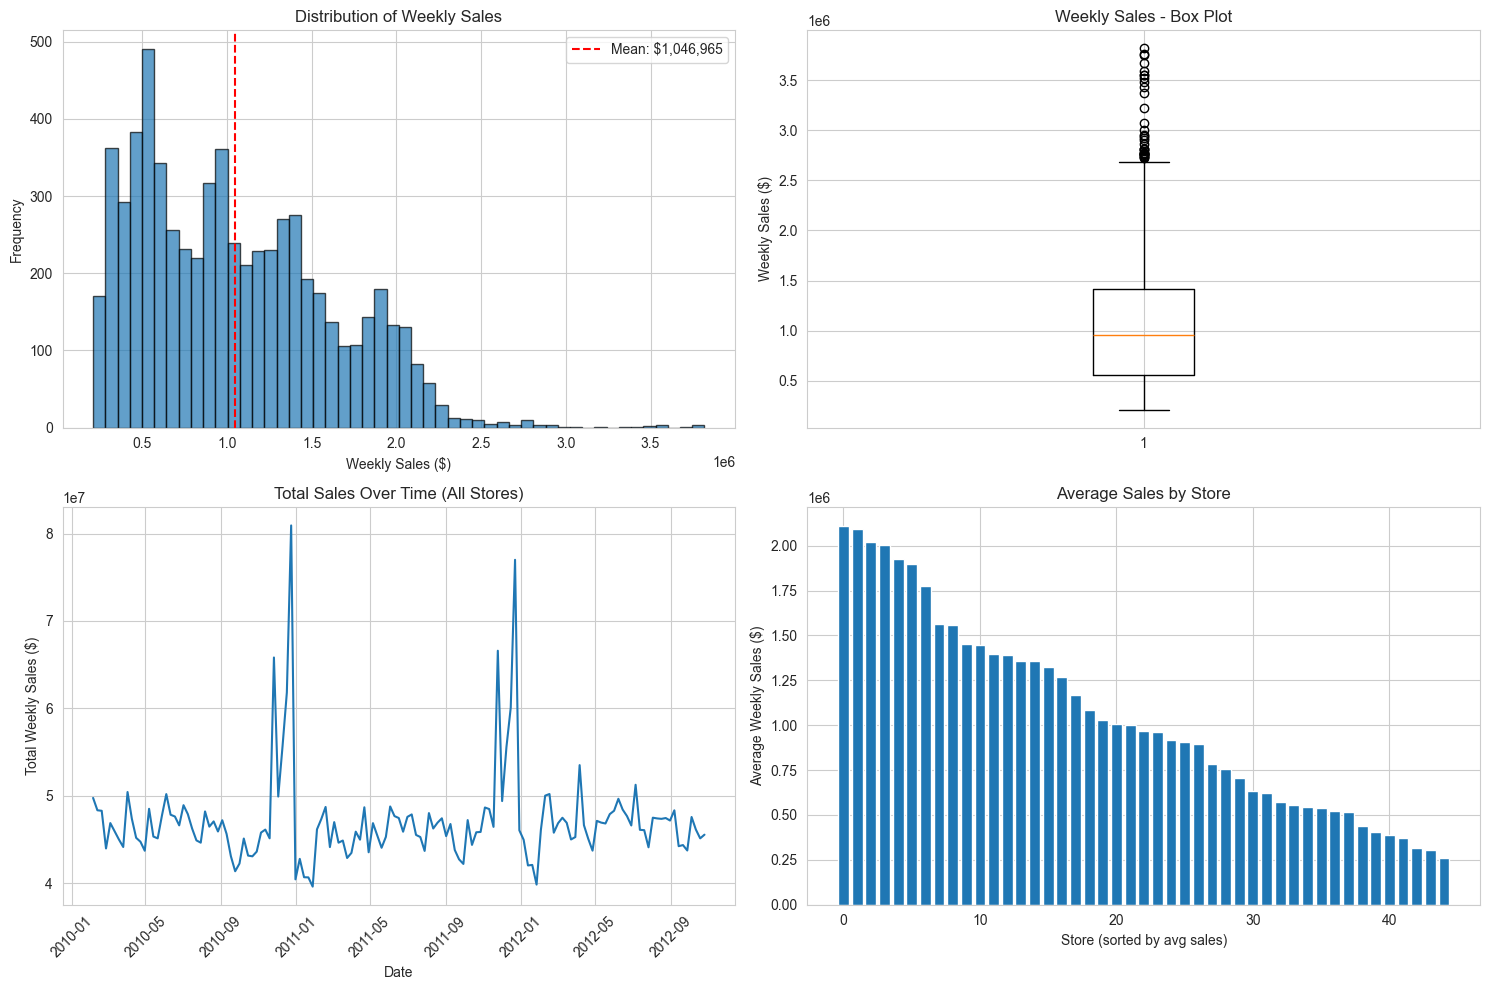


Sales Statistics:
Mean: $1,046,964.88
Median: $960,746.04
Std Dev: $564,366.62
Min: $209,986.25
Max: $3,818,686.45


In [5]:
# Sales distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(df['Weekly_Sales'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Weekly Sales ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Weekly Sales')
axes[0, 0].axvline(df['Weekly_Sales'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Weekly_Sales"].mean():,.0f}')
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(df['Weekly_Sales'])
axes[0, 1].set_ylabel('Weekly Sales ($)')
axes[0, 1].set_title('Weekly Sales - Box Plot')

# Sales over time
sales_by_date = df.groupby('Date')['Weekly_Sales'].sum()
axes[1, 0].plot(sales_by_date.index, sales_by_date.values)
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Total Weekly Sales ($)')
axes[1, 0].set_title('Total Sales Over Time (All Stores)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Sales by store
sales_by_store = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
axes[1, 1].bar(range(len(sales_by_store)), sales_by_store.values)
axes[1, 1].set_xlabel('Store (sorted by avg sales)')
axes[1, 1].set_ylabel('Average Weekly Sales ($)')
axes[1, 1].set_title('Average Sales by Store')

plt.tight_layout()
plt.show()

print(f"\nSales Statistics:")
print(f"Mean: ${df['Weekly_Sales'].mean():,.2f}")
print(f"Median: ${df['Weekly_Sales'].median():,.2f}")
print(f"Std Dev: ${df['Weekly_Sales'].std():,.2f}")
print(f"Min: ${df['Weekly_Sales'].min():,.2f}")
print(f"Max: ${df['Weekly_Sales'].max():,.2f}")

HOLIDAY vs NON-HOLIDAY SALES
Holiday weeks: 450 (7.0%)
Non-holiday weeks: 5985 (93.0%)

Average sales:
  Holiday: $1,122,887.89
  Non-holiday: $1,041,256.38
  Lift: 7.8%


C:\Users\diego\AppData\Local\Temp\ipykernel_12976\2326698002.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([non_holiday_sales, holiday_sales], labels=['Non-Holiday', 'Holiday'])


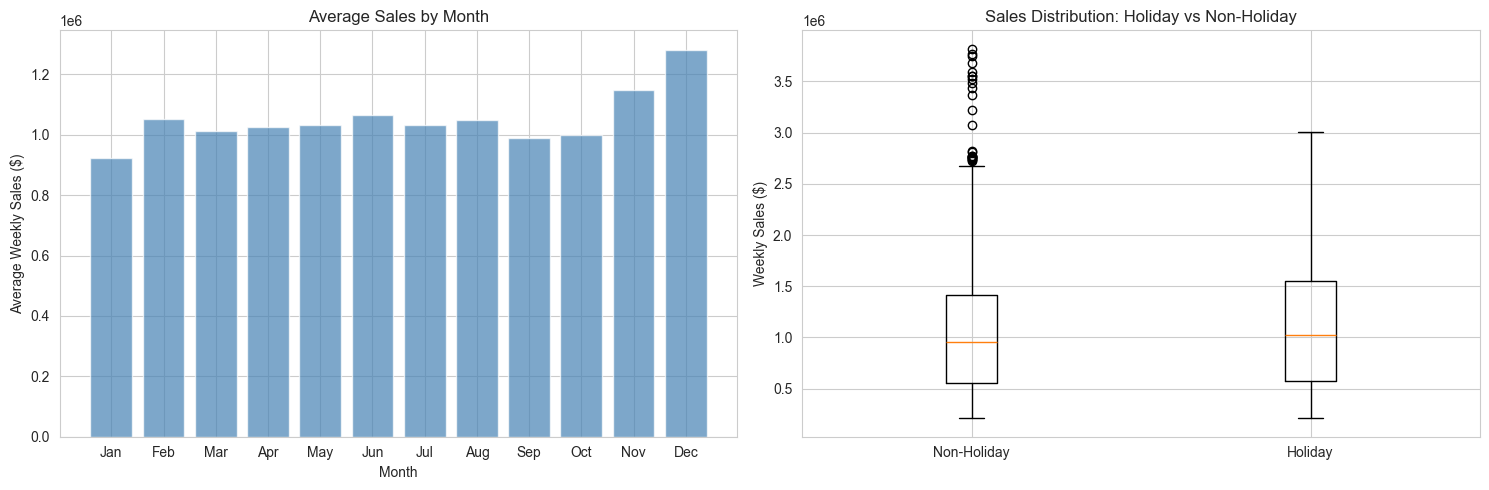


MONTHLY SALES SUMMARY
               mean            std  count        cv
Month                                              
1      9.238846e+05  472616.460339    360  0.511554
2      1.053200e+06  564207.057354    540  0.535708
3      1.013309e+06  529805.743801    585  0.522847
4      1.026762e+06  543864.624192    630  0.529689
5      1.031714e+06  536589.412470    540  0.520095
6      1.064325e+06  548683.953608    585  0.515523
7      1.031748e+06  531141.778886    630  0.514798
8      1.048017e+06  542653.059046    585  0.517790
9      9.893353e+05  510532.949375    585  0.516036
10     9.996321e+05  517186.653614    585  0.517377
11     1.147266e+06  648832.347036    360  0.565547
12     1.281864e+06  774037.720767    450  0.603838


In [6]:
# Holiday impact analysis
print("=" * 60)
print("HOLIDAY vs NON-HOLIDAY SALES")
print("=" * 60)

holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

print(f"Holiday weeks: {len(holiday_sales)} ({len(holiday_sales)/len(df)*100:.1f}%)")
print(f"Non-holiday weeks: {len(non_holiday_sales)} ({len(non_holiday_sales)/len(df)*100:.1f}%)")
print(f"\nAverage sales:")
print(f"  Holiday: ${holiday_sales.mean():,.2f}")
print(f"  Non-holiday: ${non_holiday_sales.mean():,.2f}")
print(f"  Lift: {(holiday_sales.mean()/non_holiday_sales.mean() - 1)*100:.1f}%")

# Monthly seasonality
monthly_sales = df.groupby('Month')['Weekly_Sales'].agg(['mean', 'std', 'count'])
monthly_sales['cv'] = monthly_sales['std'] / monthly_sales['mean']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Monthly average sales
axes[0].bar(monthly_sales.index, monthly_sales['mean'], color='steelblue', alpha=0.7)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Weekly Sales ($)')
axes[0].set_title('Average Sales by Month')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Holiday vs non-holiday comparison
axes[1].boxplot([non_holiday_sales, holiday_sales], labels=['Non-Holiday', 'Holiday'])
axes[1].set_ylabel('Weekly Sales ($)')
axes[1].set_title('Sales Distribution: Holiday vs Non-Holiday')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("MONTHLY SALES SUMMARY")
print("=" * 60)
print(monthly_sales)

CORRELATION WITH WEEKLY SALES
Weekly_Sales    1.000000
Fuel_Price      0.009464
Temperature    -0.063810
CPI            -0.072634
Unemployment   -0.106176
Name: Weekly_Sales, dtype: float64


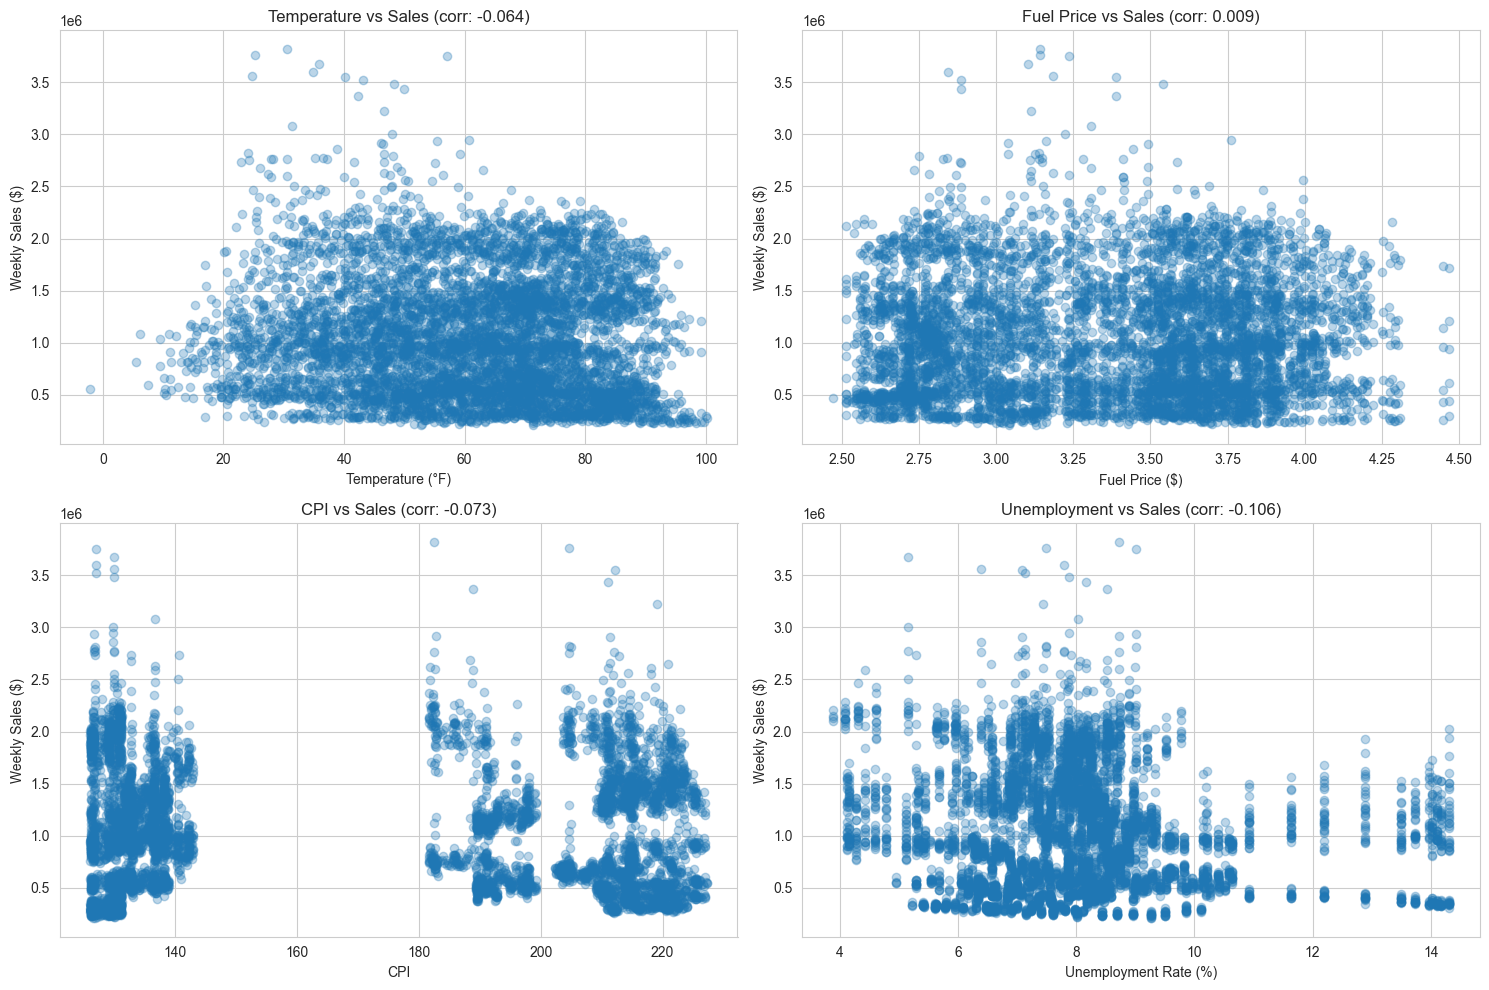

In [7]:
# Correlation analysis
print("=" * 60)
print("CORRELATION WITH WEEKLY SALES")
print("=" * 60)

correlations = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()['Weekly_Sales'].sort_values(ascending=False)
print(correlations)

# Visualize correlations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Temperature vs Sales
axes[0, 0].scatter(df['Temperature'], df['Weekly_Sales'], alpha=0.3)
axes[0, 0].set_xlabel('Temperature (°F)')
axes[0, 0].set_ylabel('Weekly Sales ($)')
axes[0, 0].set_title(f'Temperature vs Sales (corr: {df["Temperature"].corr(df["Weekly_Sales"]):.3f})')

# Fuel Price vs Sales
axes[0, 1].scatter(df['Fuel_Price'], df['Weekly_Sales'], alpha=0.3)
axes[0, 1].set_xlabel('Fuel Price ($)')
axes[0, 1].set_ylabel('Weekly Sales ($)')
axes[0, 1].set_title(f'Fuel Price vs Sales (corr: {df["Fuel_Price"].corr(df["Weekly_Sales"]):.3f})')

# CPI vs Sales
axes[1, 0].scatter(df['CPI'], df['Weekly_Sales'], alpha=0.3)
axes[1, 0].set_xlabel('CPI')
axes[1, 0].set_ylabel('Weekly Sales ($)')
axes[1, 0].set_title(f'CPI vs Sales (corr: {df["CPI"].corr(df["Weekly_Sales"]):.3f})')

# Unemployment vs Sales
axes[1, 1].scatter(df['Unemployment'], df['Weekly_Sales'], alpha=0.3)
axes[1, 1].set_xlabel('Unemployment Rate (%)')
axes[1, 1].set_ylabel('Weekly Sales ($)')
axes[1, 1].set_title(f'Unemployment vs Sales (corr: {df["Unemployment"].corr(df["Weekly_Sales"]):.3f})')

plt.tight_layout()
plt.show()

In [8]:
# Store selection for detailed analysis
print("=" * 60)
print("STORE SELECTION STRATEGY")
print("=" * 60)

# Calculate average sales per store
store_stats = df.groupby('Store')['Weekly_Sales'].agg(['mean', 'std', 'count'])
store_stats['cv'] = store_stats['std'] / store_stats['mean']
store_stats = store_stats.sort_values('mean', ascending=False)

# Categorize stores by sales volume
store_stats['percentile'] = store_stats['mean'].rank(pct=True)
store_stats['category'] = pd.cut(store_stats['percentile'], 
                                   bins=[0, 0.33, 0.67, 1.0],
                                   labels=['Low', 'Medium', 'High'])

print("\nTop 10 stores by average sales:")
print(store_stats.head(10))

print("\nBottom 10 stores by average sales:")
print(store_stats.tail(10))

# Select representative stores
high_sales_store = store_stats[store_stats['category'] == 'High'].index[0]
medium_sales_store = store_stats[store_stats['category'] == 'Medium'].index[len(store_stats[store_stats['category'] == 'Medium'])//2]
low_sales_store = store_stats[store_stats['category'] == 'Low'].index[0]

selected_stores = [high_sales_store, medium_sales_store, low_sales_store]

print(f"\n{'='*60}")
print("SELECTED STORES FOR DETAILED ANALYSIS")
print(f"{'='*60}")
for store in selected_stores:
    cat = store_stats.loc[store, 'category']
    avg = store_stats.loc[store, 'mean']
    print(f"Store {store} ({cat} volume): ${avg:,.0f} avg weekly sales")

STORE SELECTION STRATEGY

Top 10 stores by average sales:
               mean            std  count        cv  percentile category
Store                                                                   
20     2.107677e+06  275900.562742    143  0.130903    1.000000     High
4      2.094713e+06  266201.442297    143  0.127083    0.977778     High
14     2.020978e+06  317569.949476    143  0.157137    0.955556     High
13     2.003620e+06  265506.995776    143  0.132514    0.933333     High
2      1.925751e+06  237683.694682    143  0.123424    0.911111     High
10     1.899425e+06  302262.062504    143  0.159133    0.888889     High
27     1.775216e+06  239930.135688    143  0.135155    0.866667     High
6      1.564728e+06  212525.855862    143  0.135823    0.844444     High
1      1.555264e+06  155980.767761    143  0.100292    0.822222     High
39     1.450668e+06  217466.454833    143  0.149908    0.800000     High

Bottom 10 stores by average sales:
                mean          

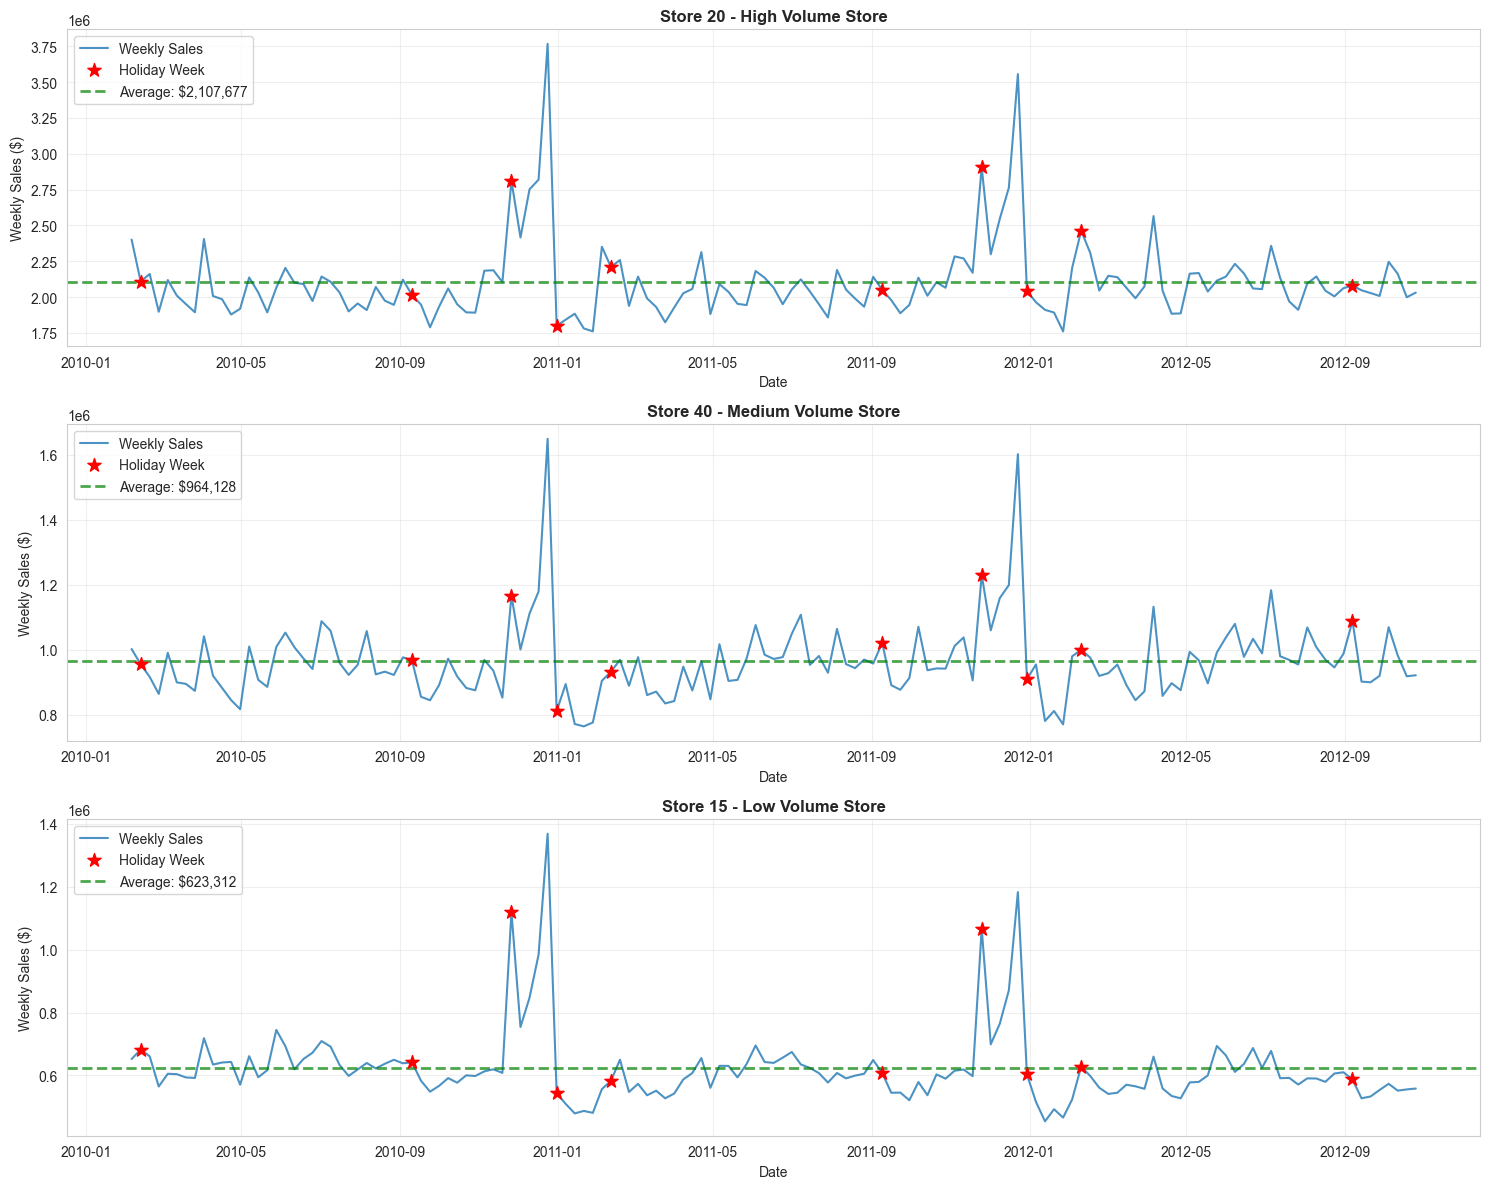

SELECTED STORES - DETAILED STATISTICS
       count          mean            std         min         25%         50%  \
Store                                                                           
15     143.0  6.233125e+05  120538.652043   454183.42   565182.54   603318.89   
20     143.0  2.107677e+06  275900.562742  1761016.51  1950865.58  2053165.41   
40     143.0  9.641280e+05  119002.112858   764014.75   896637.67   954233.87   

               75%         max  
Store                           
15      641586.925  1368318.17  
20     2155186.260  3766687.43  
40     1001262.930  1648829.18  

YEAR-OVER-YEAR COMPARISON

Store 20:
  2010: $2,119,439
  2011: $2,112,250 (-0.3%)
  2012: $2,089,016 (-1.1%)

Store 40:
  2010: $965,778
  2011: $968,087 (+0.2%)
  2012: $957,498 (-1.1%)

Store 15:
  2010: $667,157
  2011: $620,820 (-6.9%)
  2012: $577,384 (-7.0%)


In [9]:
# Visualize selected stores
df_selected = df[df['Store'].isin(selected_stores)].copy()

fig, axes = plt.subplots(3, 1, figsize=(15, 12))

for idx, store in enumerate(selected_stores):
    store_data = df_selected[df_selected['Store'] == store].sort_values('Date')
    category = store_stats.loc[store, 'category']
    avg_sales = store_stats.loc[store, 'mean']
    
    # Plot sales over time
    axes[idx].plot(store_data['Date'], store_data['Weekly_Sales'], 
                   linewidth=1.5, alpha=0.8, label='Weekly Sales')
    
    # Mark holidays
    holiday_data = store_data[store_data['Holiday_Flag'] == 1]
    axes[idx].scatter(holiday_data['Date'], holiday_data['Weekly_Sales'], 
                     color='red', s=100, marker='*', zorder=5, label='Holiday Week')
    
    # Add trend line
    axes[idx].axhline(y=avg_sales, color='green', linestyle='--', 
                     linewidth=2, alpha=0.7, label=f'Average: ${avg_sales:,.0f}')
    
    axes[idx].set_title(f'Store {store} - {category} Volume Store', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Weekly Sales ($)')
    axes[idx].legend(loc='upper left')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics for selected stores
print("=" * 80)
print("SELECTED STORES - DETAILED STATISTICS")
print("=" * 80)
summary = df_selected.groupby('Store')['Weekly_Sales'].describe()
print(summary)

# Year-over-year growth
print("\n" + "=" * 80)
print("YEAR-OVER-YEAR COMPARISON")
print("=" * 80)
for store in selected_stores:
    store_data = df[df['Store'] == store].copy()
    
    sales_2010 = store_data[store_data['Year'] == 2010]['Weekly_Sales'].mean()
    sales_2011 = store_data[store_data['Year'] == 2011]['Weekly_Sales'].mean()
    sales_2012 = store_data[store_data['Year'] == 2012]['Weekly_Sales'].mean()
    
    growth_2011 = ((sales_2011 - sales_2010) / sales_2010) * 100 if sales_2010 > 0 else 0
    growth_2012 = ((sales_2012 - sales_2011) / sales_2011) * 100 if sales_2011 > 0 else 0
    
    print(f"\nStore {store}:")
    print(f"  2010: ${sales_2010:,.0f}")
    print(f"  2011: ${sales_2011:,.0f} ({growth_2011:+.1f}%)")
    print(f"  2012: ${sales_2012:,.0f} ({growth_2012:+.1f}%)")

## Key Findings Summary

### Data Quality
- **6,435 records** across 45 stores and 143 weeks (Feb 2010 - Oct 2012)
- **No missing values** - clean dataset
- Sales range: $210K to $3.8M weekly

### Seasonality Patterns
- **Strong holiday effect**: December shows 39% higher sales vs January
- **Holiday lift**: 7.8% average increase during holiday weeks
- **Consistent peaks**: November-December drive significant revenue spikes

### Store Segmentation
Selected 3 representative stores for detailed analysis:
- **Store 20 (High)**: $2.1M avg - stable, strong holiday performance
- **Store 40 (Medium)**: $964K avg - stable baseline
- **Store 15 (Low)**: $623K avg - declining trend (-7% YoY)

### External Variables
- Temperature, fuel price, CPI, and unemployment show **weak correlation** with sales (all < 0.11)
- **Implication**: Focus forecasting on temporal patterns rather than external economic indicators

### Next Steps
1. Feature engineering for time series modeling
2. Build demand forecasting models
3. Develop inventory optimization framework
4. Quantify financial impact